In [27]:
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

usage = pd.read_excel("C:/Users/joaqu/Desktop/Estudio Estadistica Magister/ESTADISTICA INFORME/dfcombinado3.xlsx")



In [28]:
df = usage[usage['student_id'].notna()]
df = df[df['count_try_step'] != 0]


In [29]:
df.columns

Index(['Unnamed: 0', 'student_id', 'count_complete_content', 'count_try_step',
       'count_correct_attempts', 'count_incorrect_attempts', 'count_hints',
       'count_correct_without_hints', 'count_last_hint_true',
       'total_time_in_question', 'avg_time_to_first_hint',
       'more_difficult_changes', 'similar_difficulty_changes',
       'easier_changes', 'SE01_conf_aprender', 'SE02_autonomia_aprender',
       'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
       'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
       'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
       'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
       'SE11_entender_clases', 'SE13_resiliencia', 'SE_t1'],
      dtype='object')

C:\Users\joaqu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


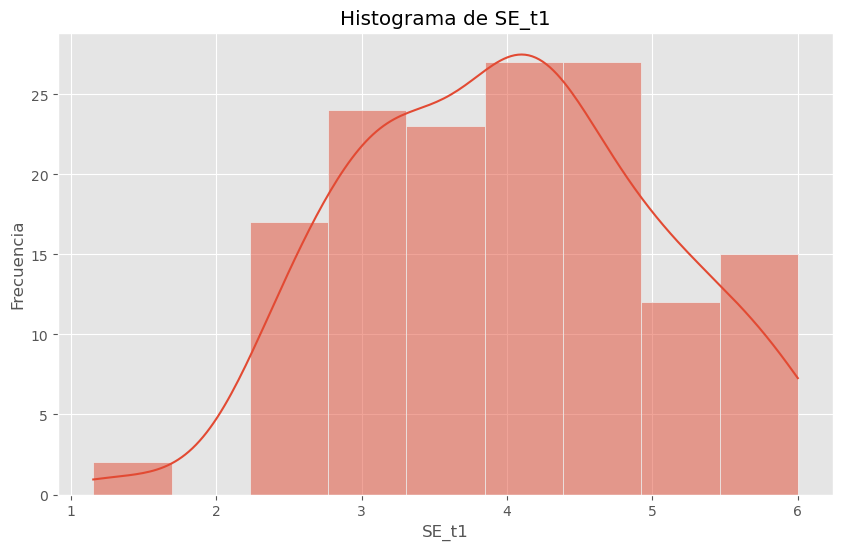

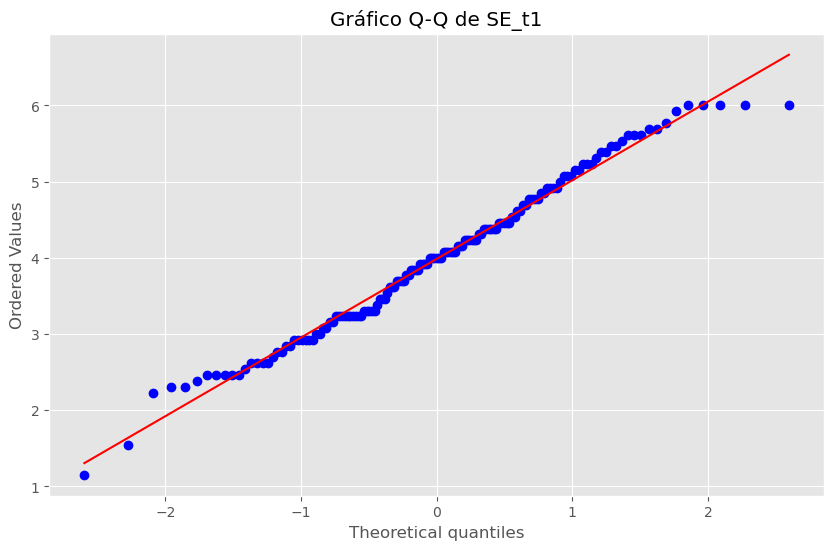

Estadístico de la prueba de Shapiro-Wilk: 0.9853120446205139
P-valor: 0.12009955942630768
No se puede rechazar la hipótesis nula. Los datos siguen una distribución normal.


In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para visualizar la distribución
plt.figure(figsize=(10, 6))
sns.histplot(df['SE_t1'], kde=True)
plt.title('Histograma de SE_t1')
plt.xlabel('SE_t1')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q para evaluar visualmente la normalidad
plt.figure(figsize=(10, 6))
stats.probplot(df['SE_t1'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de SE_t1')
plt.show()

# Prueba de Shapiro-Wilk para normalidad
stat, p_value = stats.shapiro(df['SE_t1'].dropna())  # eliminar NaN antes de la prueba
print(f"Estadístico de la prueba de Shapiro-Wilk: {stat}")
print(f"P-valor: {p_value}")

# Interpretar el resultado
if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula. Los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")


In [31]:
import scipy.stats as stats

# Dividir los grupos de acuerdo con los valores de SE_t1
grupo_2_4 = df[(df['SE_t1'] >= 2) & (df['SE_t1'] <= 4)]
grupo_4_6 = df[(df['SE_t1'] > 4) & (df['SE_t1'] <= 6)]

# Verifica si ambas muestras tienen más de un valor para realizar la prueba
if len(grupo_2_4) > 1 and len(grupo_4_6) > 1:
    # Realizar la prueba de Levene para homogeneidad de varianzas
    stat_levene, p_value_levene = stats.levene(grupo_2_4['SE_t1'], grupo_4_6['SE_t1'])
    
    print(f"Prueba de Levene: Estadístico = {stat_levene}, P-valor = {p_value_levene}")

    # Interpretar el resultado de la prueba
    if p_value_levene > 0.05:
        print("Las varianzas son homogéneas (no se rechaza la hipótesis nula).")
    else:
        print("Las varianzas no son homogéneas (se rechaza la hipótesis nula).")
else:
    print("Uno de los grupos tiene pocos datos para realizar la prueba de Levene.")


Prueba de Levene: Estadístico = 2.4514056538943656, P-valor = 0.1196299421527238
Las varianzas son homogéneas (no se rechaza la hipótesis nula).


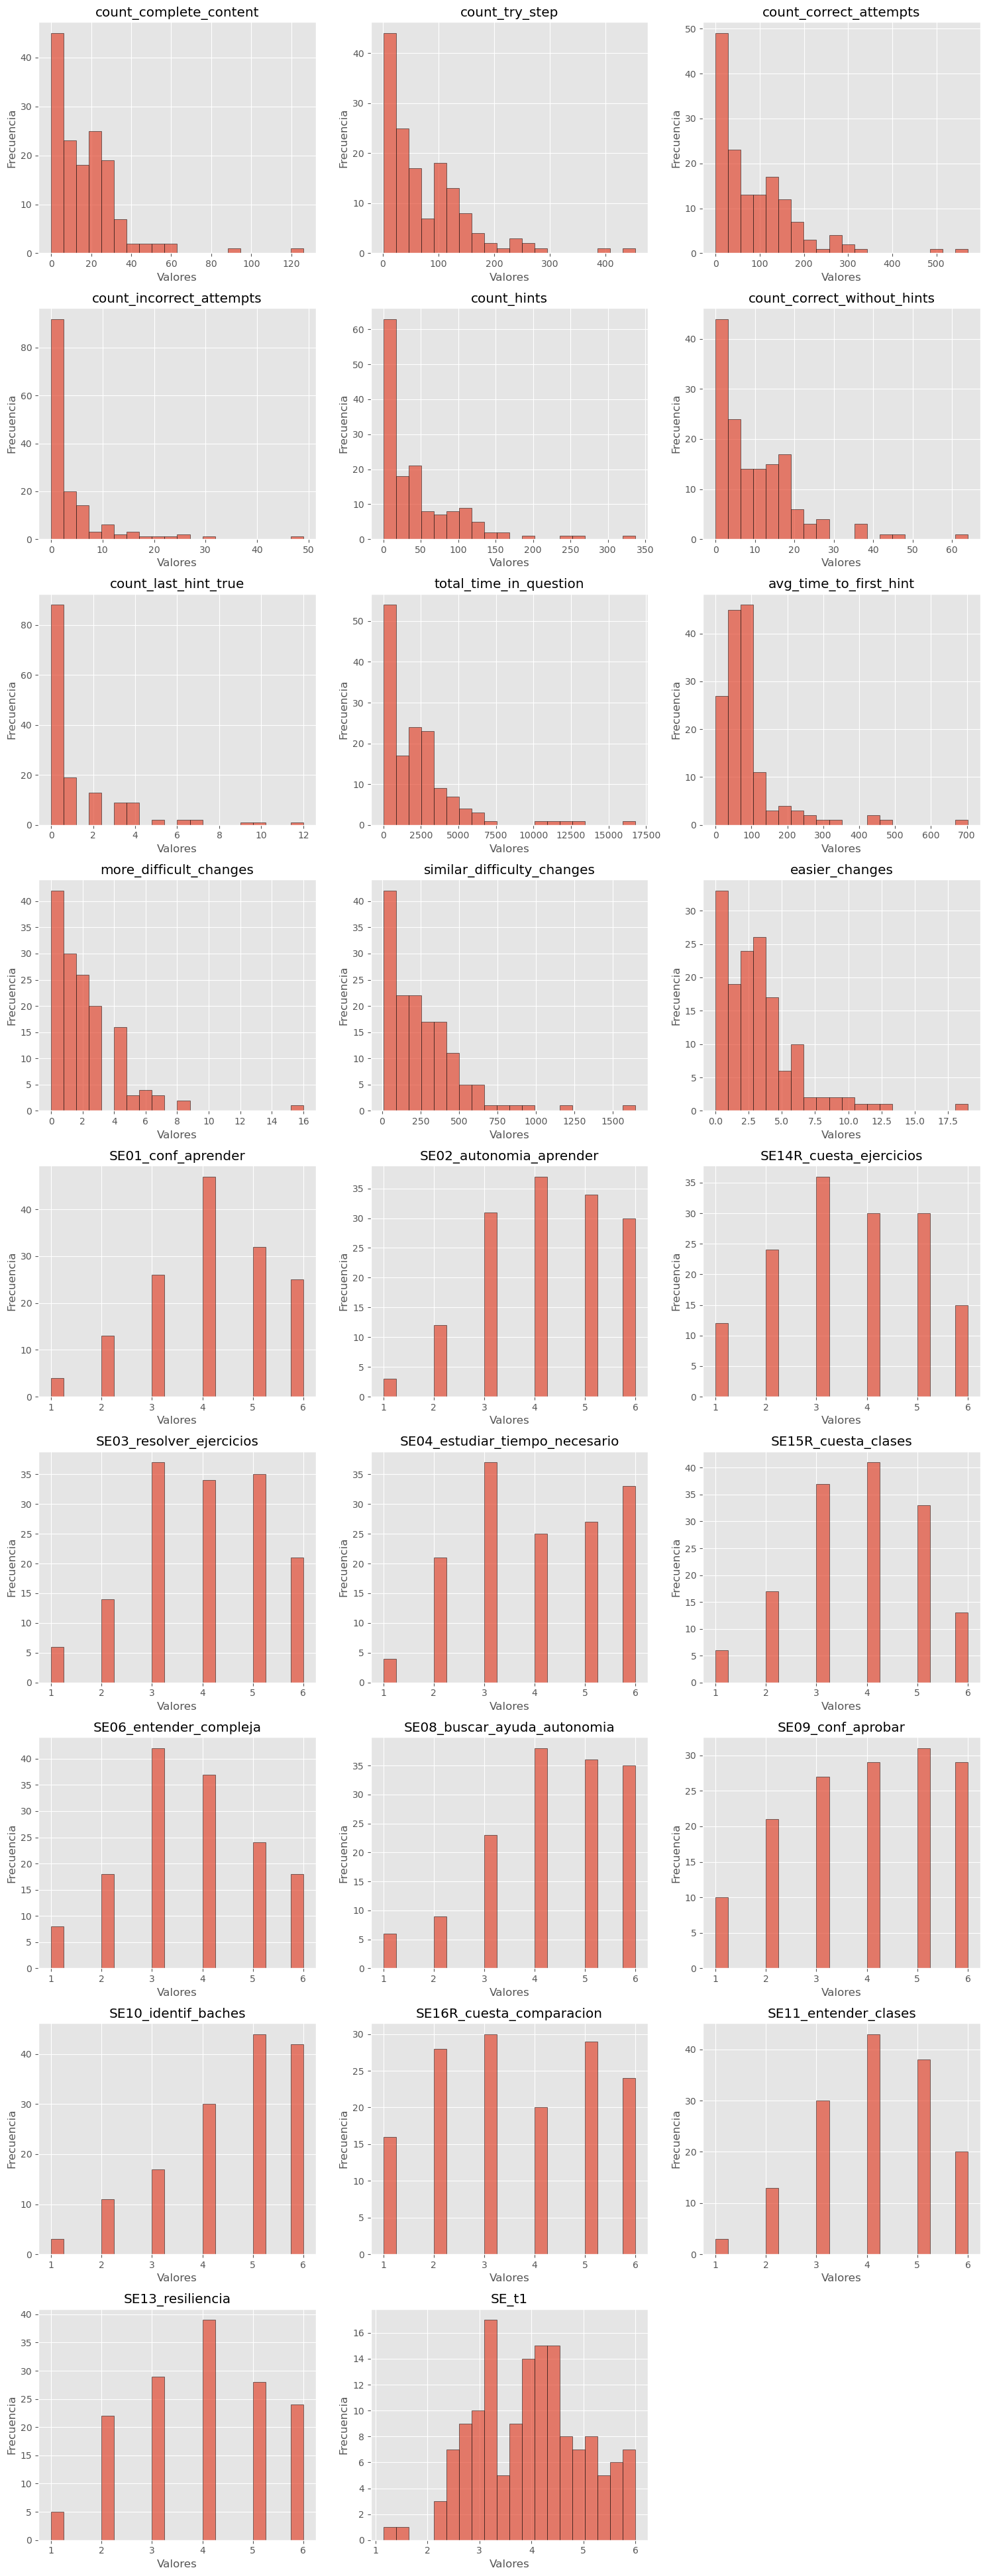

In [32]:
import matplotlib.pyplot as plt

# Lista de columnas a graficar
columns = [
    'count_complete_content', 'count_try_step', 'count_correct_attempts', 
    'count_incorrect_attempts', 'count_hints', 'count_correct_without_hints', 
    'count_last_hint_true', 'total_time_in_question', 'avg_time_to_first_hint', 
    'more_difficult_changes', 'similar_difficulty_changes', 'easier_changes', 
    'SE01_conf_aprender', 'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios', 
    'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario', 
    'SE15R_cuesta_clases', 'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia', 
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion', 
    'SE11_entender_clases', 'SE13_resiliencia', 'SE_t1'
]

# Estilo opcional (puedes cambiarlo por 'ggplot' o eliminar esta línea si no es necesario)
plt.style.use('ggplot')

# Configuración de gráficos
fig, axes = plt.subplots(nrows=len(columns)//3 + 1, ncols=3, figsize=(15, len(columns)*1.5))
axes = axes.flatten()

# Crear un histograma por cada columna
for i, col in enumerate(columns):
    if col in df.columns:  # Verificar que la columna existe
        ax = axes[i]
        df[col].hist(ax=ax, bins=20, edgecolor='black', alpha=0.7)
        ax.set_title(col)
        ax.set_xlabel('Valores')
        ax.set_ylabel('Frecuencia')
    else:
        axes[i].axis('off')  # Ocultar si no hay datos para la columna

# Eliminar ejes no usados
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



In [33]:
import scipy.stats as stats

# Lista de columnas de comportamiento
columnas_comportamiento = [
    'count_complete_content', 'count_try_step', 'count_correct_attempts', 
    'count_incorrect_attempts', 'count_hints', 'count_correct_without_hints', 
    'count_last_hint_true', 'total_time_in_question', 'avg_time_to_first_hint', 
    'more_difficult_changes', 'similar_difficulty_changes', 'easier_changes'
]

# Lista de columnas de autoeficacia
columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender',
    'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios',
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia',
    'SE09_conf_aprobar', 'SE10_identif_baches', 'SE16R_cuesta_comparacion',
    'SE11_entender_clases', 'SE13_resiliencia'
]

# Función para realizar las pruebas de dos muestras
def realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia):
    resultados = {}
    columnas_significativas = []  # Lista para guardar las columnas significativas

    # Iterar sobre las columnas de autoeficacia
    for col_auto in columnas_autoeficacia:
        # Definir los grupos basados en cada columna de autoeficacia
        grupo_bajo = df[(df[col_auto] >= 1) & (df[col_auto] <= 3)]
        grupo_alto = df[(df[col_auto] >= 4) & (df[col_auto] <= 6)]
        
        # Comprobar que ambos grupos no estén vacíos antes de continuar
        if grupo_bajo.empty or grupo_alto.empty:
            continue
        
        # Evaluar las pruebas para cada columna de comportamiento
        for col_comport in columnas_comportamiento:
            # Obtener los datos de comportamiento de ambos grupos
            datos_bajo_comport = grupo_bajo[col_comport].dropna()
            datos_alto_comport = grupo_alto[col_comport].dropna()

            # Comprobar si los datos son normales usando la prueba de Shapiro-Wilk
            stat_bajo, p_bajo = stats.shapiro(datos_bajo_comport)
            stat_alto, p_alto = stats.shapiro(datos_alto_comport)

            # Evaluar normalidad y elegir la prueba estadística correspondiente
            if p_bajo > 0.05 and p_alto > 0.05:
                # Si ambos son normales, realizamos el t-test para dos muestras
                stat_t, p_t = stats.ttest_ind(datos_bajo_comport, datos_alto_comport, equal_var=False)
                test = "Two-Sample t-test"
            else:
                # Si no son normales, realizamos el test de Mann-Whitney (Wilcoxon)
                stat_mw, p_mw = stats.mannwhitneyu(datos_bajo_comport, datos_alto_comport)
                stat_t, p_t = stat_mw, p_mw
                test = "Mann-Whitney U test"
            
            # Solo guardamos e imprimimos los resultados si el p-valor es menor que 0.05
            if p_t < 0.05:
                if col_comport not in resultados:
                    resultados[col_comport] = []
                
                resultados[col_comport].append({
                    'autoeficacia_column': col_auto, 
                    'test': test, 
                    'p_value': p_t
                })
                
                # Agregar la columna a la lista de significativas si no está ya
                if col_comport not in columnas_significativas:
                    columnas_significativas.append(col_comport)
    
    return resultados, columnas_significativas

# Comparar las columnas de comportamiento entre los grupos bajos y altos de autoeficacia
resultados_comparaciones, columnas_significativas = realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia)

# Mostrar solo los resultados significativos
for col_comport, resultado in resultados_comparaciones.items():
    for r in resultado:
        print(f"{col_comport} | Autoeficacia columna: {r['autoeficacia_column']} | Test: {r['test']} | P-valor = {r['p_value']}")

# Imprimir las columnas de comportamiento significativas
print("\nColumnas de comportamiento significativas:")
print(columnas_significativas)


avg_time_to_first_hint | Autoeficacia columna: SE02_autonomia_aprender | Test: Mann-Whitney U test | P-valor = 0.004349809219540726
avg_time_to_first_hint | Autoeficacia columna: SE16R_cuesta_comparacion | Test: Mann-Whitney U test | P-valor = 0.028577482402284908
more_difficult_changes | Autoeficacia columna: SE14R_cuesta_ejercicios | Test: Mann-Whitney U test | P-valor = 0.04482330136099468
more_difficult_changes | Autoeficacia columna: SE13_resiliencia | Test: Mann-Whitney U test | P-valor = 0.01435728607353021
count_complete_content | Autoeficacia columna: SE03_resolver_ejercicios | Test: Mann-Whitney U test | P-valor = 0.014973764880940791
count_complete_content | Autoeficacia columna: SE13_resiliencia | Test: Mann-Whitney U test | P-valor = 0.008773491341488918
count_try_step | Autoeficacia columna: SE03_resolver_ejercicios | Test: Mann-Whitney U test | P-valor = 0.029320848641632605
count_try_step | Autoeficacia columna: SE13_resiliencia | Test: Mann-Whitney U test | P-valor = 0

### Regresión


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.27      0.25      0.26        12
           1       0.53      0.56      0.54        18

    accuracy                           0.43        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.42      0.43      0.43        30



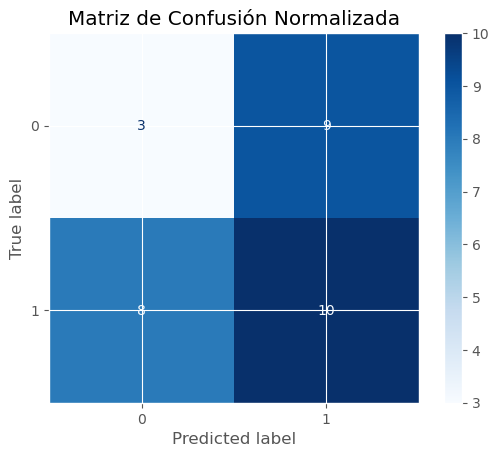


AUC: 0.370


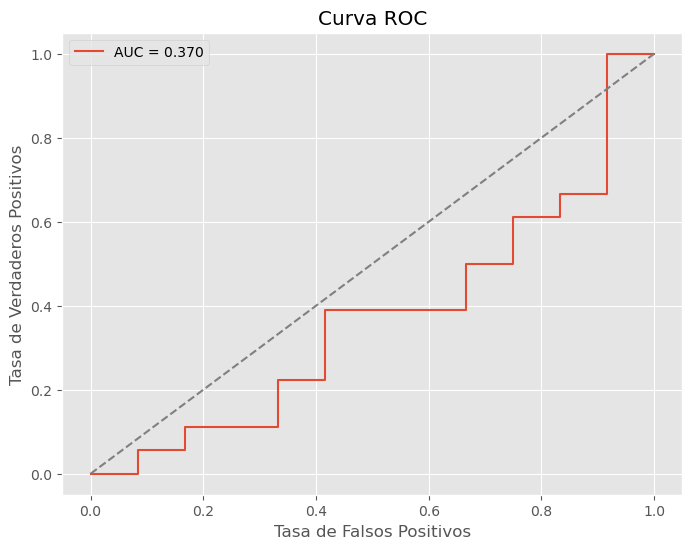


Coeficientes del modelo:
                 Variable  Coeficiente
1  more_difficult_changes     0.017666
2  total_time_in_question     0.000046
0  avg_time_to_first_hint    -0.001622


In [42]:
from imblearn.over_sampling import SMOTE

# Filtrar variables con VIF < 10
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
variables_seleccionadas = vif_data[vif_data["VIF"] < 10]["Variable"].tolist()

# Filtrar datos con variables seleccionadas
X_train = X_train[variables_seleccionadas]
X_test = X_test[variables_seleccionadas]

# Rebalancear clases con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Reentrenar el modelo
modelo = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
modelo.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluar desempeño
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Normalizada")
plt.show()

# Calcular y graficar ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)



Distribución de clases:
autoeficacia_binaria
1    89
0    58
Name: count, dtype: int64

VIF (Factor de Inflación de la Varianza):
                      Variable       VIF
0  count_correct_without_hints  2.260813
1       total_time_in_question  2.260813

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.42      0.67      0.52        12
           1       0.64      0.39      0.48        18

    accuracy                           0.50        30
   macro avg       0.53      0.53      0.50        30
weighted avg       0.55      0.50      0.50        30


Matriz de confusión:
[[ 8  4]
 [11  7]]


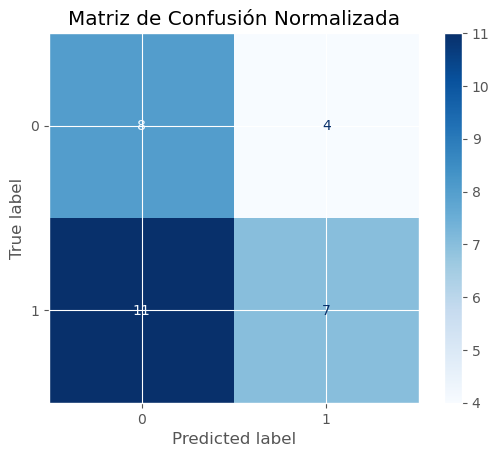


AUC: 0.519


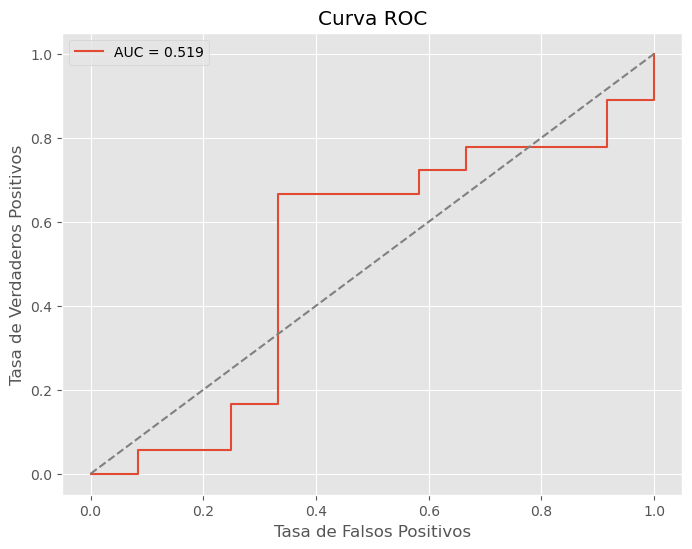


Coeficientes del modelo:
                      Variable  Coeficiente
0  count_correct_without_hints     0.026301
1       total_time_in_question    -0.000039


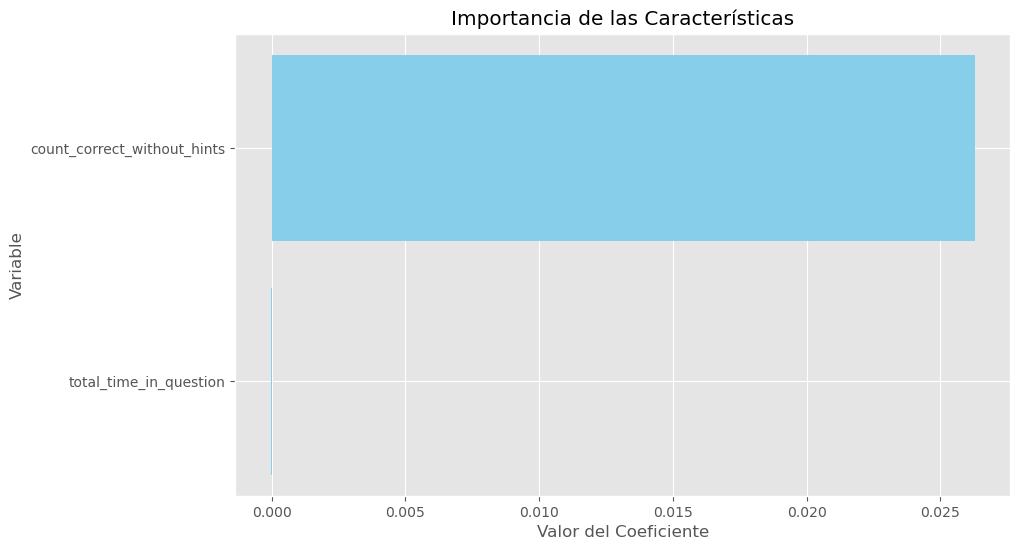

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Variables significativas basadas en Mann-Whitney U test
variables_significativas = ['count_correct_without_hints','total_time_in_question']

# Crear la variable dependiente binaria
df['autoeficacia_binaria'] = np.where(df['SE09_conf_aprobar'] >= 4, 1, 0)

# Filtrar datos relevantes
df_modelo = df[['autoeficacia_binaria'] + variables_significativas].dropna()

# Revisar el balance de clases
print("Distribución de clases:")
print(df_modelo['autoeficacia_binaria'].value_counts())

# Dividir datos en entrenamiento y prueba
X = df_modelo[variables_significativas]
y = df_modelo['autoeficacia_binaria']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Eliminar columnas con valores constantes o con poca variabilidad
X_train = X_train.loc[:, X_train.nunique() > 1]
X_test = X_test.loc[:, X_train.nunique() > 1]

# Verificar si existen columnas con cero variabilidad en los datos
if X_train.empty or X_test.empty:
    print("Error: Los datos de entrenamiento o prueba están vacíos.")
else:
    # Calcular el VIF (Factor de Inflación de la Varianza)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    print("\nVIF (Factor de Inflación de la Varianza):")
    print(vif_data)

# Ajustar modelo de regresión logística con ponderación de clases
modelo = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Matriz de confusión normalizada
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Normalizada")
plt.show()

# Calcular y graficar ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Mostrar los coeficientes de la regresión logística
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)

# Visualizar importancia de características
plt.figure(figsize=(10, 6))
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='skyblue')
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variable")
plt.title("Importancia de las Características")
plt.gca().invert_yaxis()
plt.show()



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.48      0.61      0.54        18
           1       0.68      0.56      0.61        27

    accuracy                           0.58        45
   macro avg       0.58      0.58      0.57        45
weighted avg       0.60      0.58      0.58        45


AUC: 0.591

Matriz de confusión:
[[11  7]
 [12 15]]

Coeficientes del modelo:
                      Variable  Coeficiente
5  count_correct_without_hints     0.033933
4       count_correct_attempts     0.032559
6   similar_difficulty_changes     0.008676
0       avg_time_to_first_hint     0.000277
7       total_time_in_question     0.000001
2       count_complete_content    -0.026784
3               count_try_step    -0.058498
1       more_difficult_changes    -0.147759

Precisión: 0.682
Recall: 0.556
F1-score: 0.612
Exactitud: 0.578


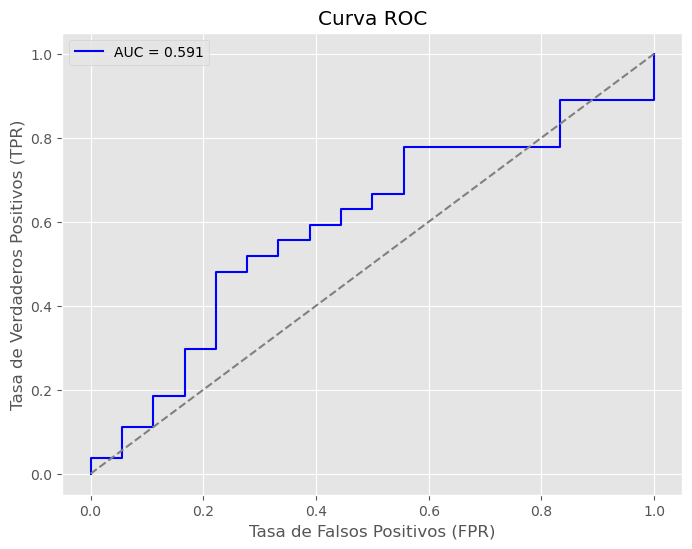

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df[variables_significativas]  # Variables seleccionadas previamente
y = df['autoeficacia_binaria']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo con regularización L1 y manejo de desbalance
modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)

# Entrenar el modelo
modelo_l1.fit(X_train, y_train)

# Predicciones
y_pred = modelo_l1.predict(X_test)
y_prob = modelo_l1.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Cálculo de AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_l1.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)

# Métricas adicionales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecisión: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Exactitud: {accuracy:.3f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        18
           1       0.61      0.52      0.56        27

    accuracy                           0.51        45
   macro avg       0.51      0.51      0.51        45
weighted avg       0.53      0.51      0.52        45


AUC: 0.409

Matriz de confusión:
[[ 9  9]
 [13 14]]

Coeficientes del modelo:
                      Variable  Coeficiente
0  count_correct_without_hints     0.023999


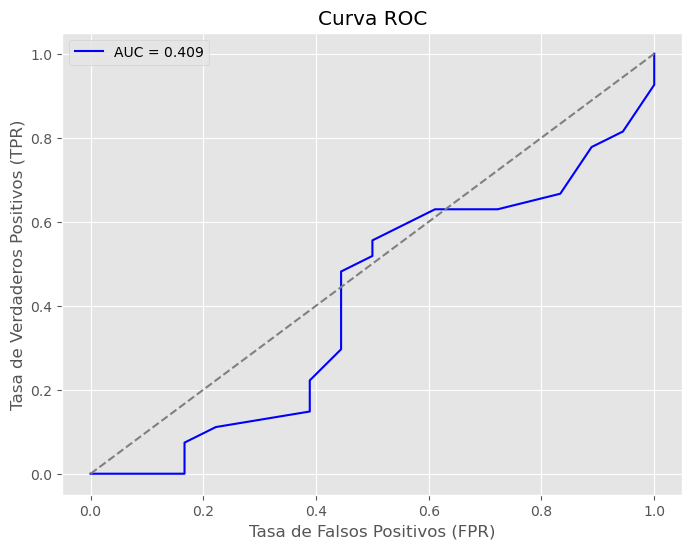

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Seleccionar la única variable predictora 'count_try_step'
X = df[['count_correct_without_hints']]  # Solo 'count_try_step' como variable predictora
y = df['autoeficacia_binaria']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo con regularización L1 y manejo de desbalance
modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)

# Entrenar el modelo
modelo_l1.fit(X_train, y_train)

# Predicciones
y_pred = modelo_l1.predict(X_test)
y_prob = modelo_l1.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_l1.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


C:\Users\joaqu\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.44      0.65      0.53        23
           1       0.65      0.44      0.53        34

    accuracy                           0.53        57
   macro avg       0.55      0.55      0.53        57
weighted avg       0.57      0.53      0.53        57


AUC: 0.501

Matriz de confusión:
[[15  8]
 [19 15]]

Coeficientes del modelo:
                      Variable  Coeficiente
1       count_complete_content     0.110519
0               count_try_step     0.012360
3  count_correct_without_hints    -0.019169
4     count_incorrect_attempts    -0.021230
5       count_correct_attempts    -0.027570
2       more_difficult_changes    -0.055833


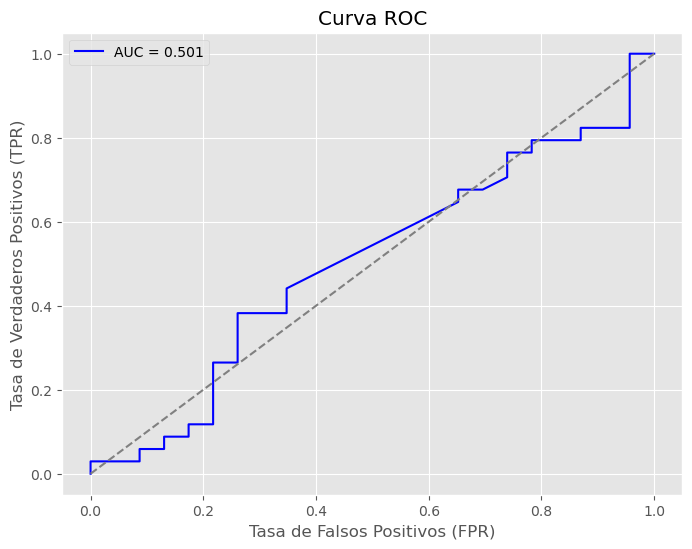

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Variables seleccionadas
variables_interes = ['count_try_step', 'count_complete_content', 'more_difficult_changes',
                     'count_correct_without_hints', 'count_incorrect_attempts', 'count_correct_attempts']

# Separar características y variable objetivo
X = df[variables_interes]  # Variables seleccionadas
y = df['autoeficacia_binaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo con regularización L1 y manejo de desbalance
modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)

# Entrenar el modelo
modelo_l1.fit(X_train, y_train)

# Predicciones
y_pred = modelo_l1.predict(X_test)
y_prob = modelo_l1.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_l1.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()



VIF (Factor de Inflación de Varianza):
                      Variable       VIF
0                        const  3.911242
1     count_incorrect_attempts  1.027380
2                  count_hints  4.695497
3  count_correct_without_hints  4.275921
4         count_last_hint_true  2.380105
5       total_time_in_question  3.149254
6       avg_time_to_first_hint  1.817901
7       more_difficult_changes  4.426471
8               easier_changes  4.056328
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        15
           1       0.47      0.47      0.47        15

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.47        30
weighted avg       0.47      0.47      0.47        30


AUC: 0.444

Matriz de confusión:
[[7 8]
 [8 7]]

Coeficientes del modelo:
                      Variable  Coeficiente
7               easier_changes     0.176585
2  count_correct_without_hints    

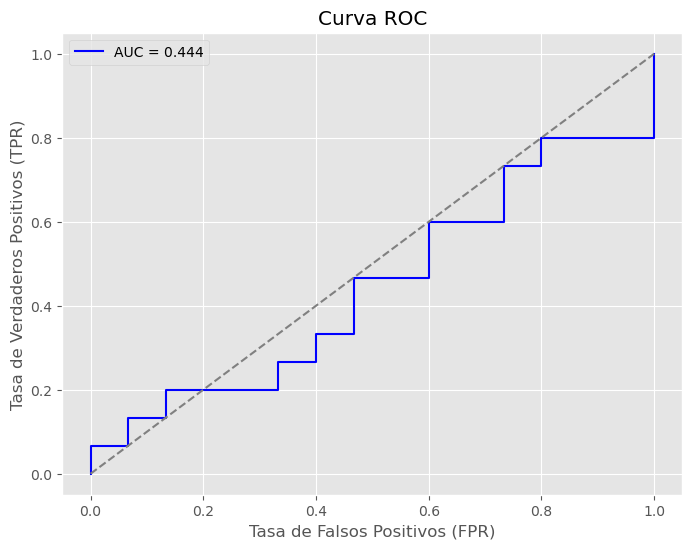

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Variables seleccionadas
variables_interes = [ 
    'count_incorrect_attempts', 'count_hints', 'count_correct_without_hints', 
    'count_last_hint_true', 'total_time_in_question', 'avg_time_to_first_hint', 
    'more_difficult_changes', 'easier_changes']

# Separar características y variable objetivo
X = df[variables_interes]  # Variables seleccionadas
y = df['autoeficacia_binaria']  # Variable objetivo

# Crear un DataFrame para manejo conjunto
df_full = X.copy()
df_full['autoeficacia_binaria'] = y

# Verificar el tamaño mínimo entre los dos grupos
tam_minimo = min(
    len(df_full[df_full['autoeficacia_binaria'] == 0]),
    len(df_full[df_full['autoeficacia_binaria'] == 1])
)

# Asegurar que el tamaño de la muestra no sea mayor al tamaño mínimo
n_muestra = min(tam_minimo, 50)

# Muestreo aleatorio estratificado con el tamaño ajustado
grupo_baja = df_full[df_full['autoeficacia_binaria'] == 0].sample(n=n_muestra, random_state=42)
grupo_alta = df_full[df_full['autoeficacia_binaria'] == 1].sample(n=n_muestra, random_state=42)

# Combinar los dos grupos
df_balanced = pd.concat([grupo_baja, grupo_alta])

# Separar características y variable objetivo para el modelo
X_balanced = df_balanced[variables_interes]
y_balanced = df_balanced['autoeficacia_binaria']

# Calcular el VIF para cada variable
X_with_const = add_constant(X_balanced)  # Agregar constante para calcular el VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Imprimir el VIF de cada variable
print("\nVIF (Factor de Inflación de Varianza):")
print(vif_data)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

# Modelo con regularización L1 y manejo de desbalance
modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)

# Entrenar el modelo
modelo_l1.fit(X_train, y_train)

# Predicciones
y_pred = modelo_l1.predict(X_test)
y_prob = modelo_l1.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC: {auc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X_balanced.columns,
    'Coeficiente': modelo_l1.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coeficientes)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()